<a href="https://colab.research.google.com/github/Giaokeo/Giaokeo/blob/main/Nhandien10loaitraicayVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/10loaitraicay/Training',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/10loaitraicay/Validation',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 100 images belonging to 10 classes.
Found 59 images belonging to 10 classes.


In [37]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/30
34/34 [==============================] - 6s 158ms/step - loss: 2.5608 - accuracy: 0.1000 - val_loss: 2.2917 - val_accuracy: 0.0508
Epoch 2/30
34/34 [==============================] - 5s 151ms/step - loss: 2.3210 - accuracy: 0.1100 - val_loss: 2.2772 - val_accuracy: 0.1864
Epoch 3/30
34/34 [==============================] - 5s 149ms/step - loss: 2.3257 - accuracy: 0.1700 - val_loss: 2.2817 - val_accuracy: 0.1186
Epoch 4/30
34/34 [==============================] - 5s 149ms/step - loss: 2.2732 - accuracy: 0.1800 - val_loss: 2.1114 - val_accuracy: 0.1356
Epoch 5/30
34/34 [==============================] - 5s 156ms/step - loss: 2.2514 - accuracy: 0.1600 - val_loss: 2.2972 - val_accuracy: 0.1017
Epoch 6/30
34/34 [==============================] - 5s 150ms/step - loss: 2.2481 - accuracy: 0.1300 - val_loss: 2.3314 - val_accuracy: 0.0847
Epoch 7/30
34/34 [==============================] - 5s 150ms/step - loss: 2.2475 - accuracy: 0.1300 - val_loss: 2.1661 - val_accuracy: 0.1356
Epoch 

In [38]:
from keras.models import Sequential, load_model

In [39]:
dir_path='//content/drive/MyDrive/10loaitraicay/Testing'

for i in os.listdir(dir_path):
  print(i)

1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg
10.jpg


In [48]:
validation_dataset.class_indices

{'Bi_dao': 0,
 'Bo': 1,
 'Ca_tim': 2,
 'Cam': 3,
 'Chuoi': 4,
 'Du_du': 5,
 'Dua_hau': 6,
 'Nho': 7,
 'Tao': 8,
 'Xoai': 9}

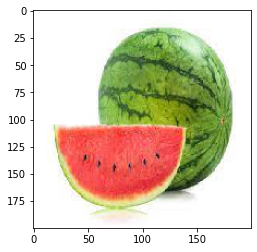

Dua_hau


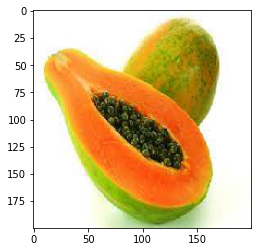

Du_du


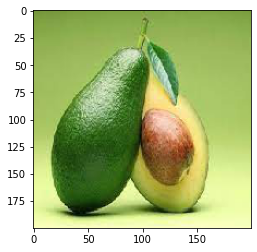

Bo


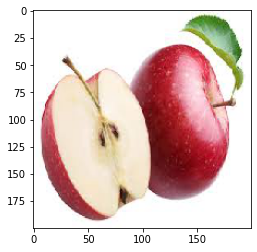

Tao


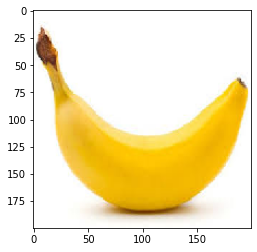

Chuoi


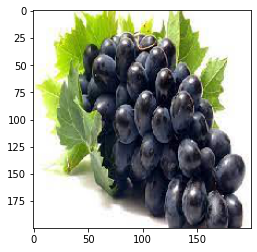

Nho


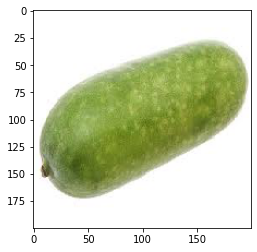

Bi_dao


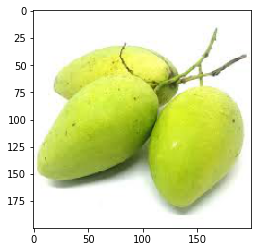

Xoai


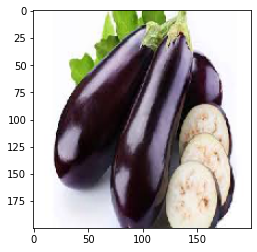

Ca_tim


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/10loaitraicay/Testing'

for i in range (9):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(200,200))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("Bi_dao")
    elif predict==1: 
      print("Bo")
    elif predict==2: 
      print("Ca_tim")
    elif predict==3: 
      print("Cam")
    elif predict==4: 
      print("Chuoi")
    elif predict==5: 
      print("Du_du")
    elif predict==6: 
      print("Dua_hau")
    elif predict==7: 
      print("Nho")
    elif predict==8: 
      print("Tao")
    elif predict==9: 
      print("Xoai")